In [1]:
library('BMA')

Loading required package: survival

Loading required package: leaps

Loading required package: robustbase


Attaching package: ‘robustbase’


The following object is masked from ‘package:survival’:

    heart


Loading required package: inline

Loading required package: rrcov

Scalable Robust Estimators with High Breakdown Point (version 1.7-2)




In [4]:
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


In [5]:
cols = colnames(mtcars)
cols

[1] "mpg"  "cyl"  "disp" "hp"   "drat" "wt"   "qsec" "vs"   "am"   "gear"
[11] "carb"

In [6]:
yvar = mtcars[,('mpg')]
xvars = mtcars[,cols[-1]]
bma = bicreg(xvars, yvar, strict = FALSE, OR = 2)

In [7]:
summary(bma)


Call:
bicreg(x = xvars, y = yvar, strict = FALSE, OR = 2)


  5  models were selected
 Best  5  models (cumulative posterior probability =  1 ): 

           p!=0    EV        SD        model 1    model 2    model 3  
Intercept  100.0  27.211564  13.82229    9.61778   39.68626   37.22727
cyl         37.9  -0.489171   0.71049      .       -1.50779      .    
disp         0.0   0.000000   0.00000      .          .          .    
hp          31.5  -0.008011   0.01373      .          .       -0.03177
drat         0.0   0.000000   0.00000      .          .          .    
wt         100.0  -3.816159   0.93260   -3.91650   -3.19097   -3.87783
qsec        45.2   0.505065   0.59539    1.22589      .          .    
vs           0.0   0.000000   0.00000      .          .          .    
am          28.8   0.845872   1.53016    2.93584      .          .    
gear         0.0   0.000000   0.00000      .          .          .    
carb         0.0   0.000000   0.00000      .          .          .    


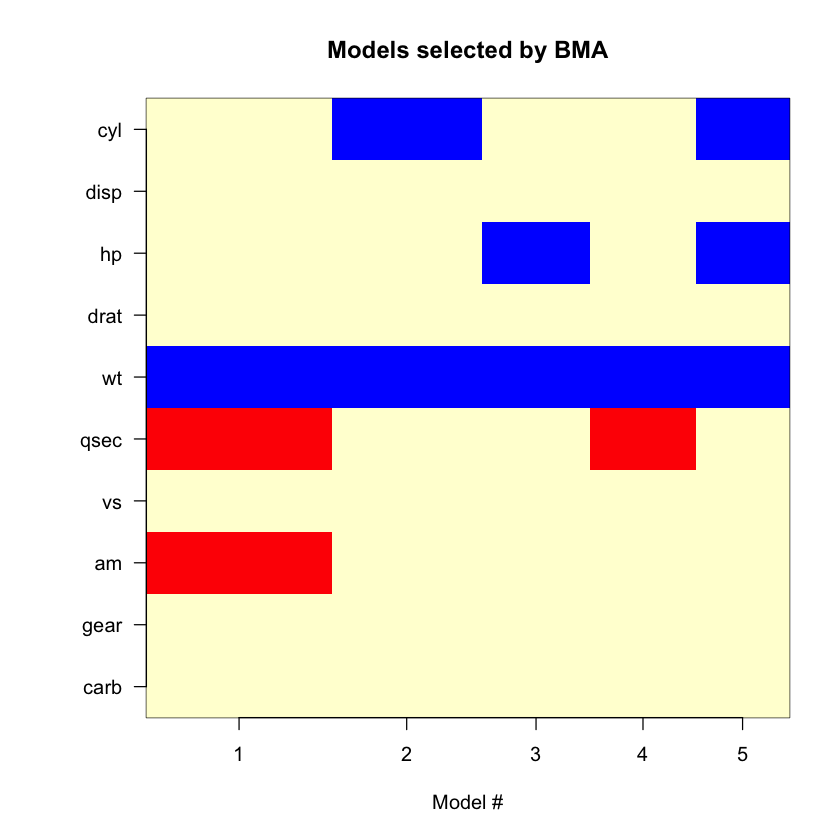

In [8]:
imageplot.bma(bma)

## Models 2: 
- explanation:
- No. Variables: model 1 used 3 variables and r2 was 0.85,
model 2 uses 2 variables and r2 was 0.83... small dataset couldn't tell us how we could save the resource...
however, bigger datasets can.
- p!: the probability of each variable contributes to the model
- EV (expected value): a minus value has a negative linear to output, and vice versa
- sd: standard deviation
- R2 -: the R2 coefficient of determination 
is a statistical measure of how well the regression predictions approximate the real data points
- BIC: the smaller the BIC is, the better the model is
- post probability: model 1 appeared at 28.8% in thousands of sample selection

In [3]:
library('relaimpo')

Loading required package: MASS

Loading required package: boot


Attaching package: ‘boot’


The following object is masked from ‘package:robustbase’:

    salinity


The following object is masked from ‘package:survival’:

    aml


Loading required package: survey

Loading required package: grid

Loading required package: Matrix


Attaching package: ‘survey’


The following object is masked from ‘package:graphics’:

    dotchart


Loading required package: mitools

This is the global version of package relaimpo.


If you are a non-US user, a version with the interesting additional metric pmvd is available


from Ulrike Groempings web site at prof.beuth-hochschule.de/groemping.




In [5]:
m = lm(mpg ~ wt + qsec + am, data=mtcars)

In [6]:
### Here we took 3 variables: wt, qsec and am to predict..
calc.relimp(m, type='lmg', rela=T, rank=T)

Response variable: mpg 
Total response variance: 36.3241 
Analysis based on 32 observations 

3 Regressors: 
wt qsec am 
Proportion of variance explained by model: 84.97%
Metrics are normalized to sum to 100% (rela=TRUE). 

Relative importance metrics: 

           lmg
wt   0.5640407
qsec 0.1853428
am   0.2506165

Average coefficients for different model sizes: 

            1X       2Xs       3Xs
wt   -5.344472 -5.200397 -3.916504
qsec  1.412125  1.455534  1.225886
am    7.244939  4.426358  2.935837

### comments:
- importance metrics: the total is 100%